<a href="https://colab.research.google.com/github/shimshimee/class2021Spring/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# source: pure tone(sin wave)의 합
# phasor: pure tone을 만듦
# pulse train: source를 만듦

In [45]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

In [3]:
theta = np.pi/2       # 파이는 180도, 1/2는 90도
np.sin(theta)

1.0

In [5]:
theta = np.pi*0       # 복소수 i는 1j로 표현
                      # 0 90 180 270 360
np.exp(theta*1j)      # (1,0) (0,1) (-1,0) (0,-1)

(1+0j)

In [24]:
import plotly.graph_objects as go
import numpy as np

amp = 1
sr = 10000
dur = 0.5
freq = 100.0

t = np.arange(1, sr * dur+1)/sr
theta = t * 2*np.pi * freq
c = np.exp(theta*1j)

x, y, z = t[0:300], c.real[0:300], c.imag[0:300]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.show()

# **Generate pulse train (=harmonics, source)**

In [39]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = amp * np.sin(theta)

  return s, t, theta

amp = 1
sr = 10000                          # Sampling rate
dur = 0.5

F0 = 100                            # Fundamental frequency의 배음으로 올라감
Fend = int(sr/2)                    # Sampling rate의 1/2, 표현 가능한 최대 주파수
# Nyquist frequency: 적어도 마루와 골에 Sample이 있어야 표현할 수 있으므로 Sr의 1/2

s_all = 0
for freq in range(F0, Fend+1, F0):  # 0부터 5000까지 100만큼 증가
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s                        # s_all이라는 변수에 s를 계속 더하라

# **Filter source**

BW(Band Width)

: 산맥이 얼마나 뾰족한지 (모음의 구별 없음, 갈수록 덜 뾰족해짐)

In [8]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b


In [ ]:
s = s_all

In [ ]:
RG = 0                        # 산맥의 위치(Hz)
BWG = 100                     # 그것의 Band Width
a, b = resonance(sr,RG,BWG)   # 0에 산맥을 만들면 성대에서 나듯이 소리가 점점 작아짐(amp)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 281
BWG = 90
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2281
BWG = 110
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3187
BWG = 170
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3781
BWG = 250
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
s = lfilter(np.array([1, -1]), np.array([1]), s)    # 입술이 소리를 증폭시킴
ipd.Audio(s, rate=sr)

In [14]:
from google.colab import files
!rm *.wav                       # wav로 끝나는 모든 파일을 없애라
tmp = files.upload()
fn = list(tmp)[0]               # tmp를 dict에서 list로 바꿔주고 파일에 접근

Saving a.wav to a.wav


In [19]:
from scipy.io import wavfile
sr, s = wavfile.read(fn)      # sr: sampling rate, s: signal
nSamp = len(s)
dur = nSamp / sr              # sr- 10000, len(s)- 4370, dur- 0.437
t = np.linspace(1/sr, dur, nSamp)

a 파일을 분석하기 위해

길이가 같은 0.437초짜리 complex phasor를 만듦

최고주파는 Sampling rate과 같게

최저주파는 Sampling rate/512

In [40]:
def phasor_complex(amp, sr, dur, freq):

  t = np.arrange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq
  c = amp * np.exp(theta*1j)

  return c, t, theta

In [44]:
nFFT = 512                    # 숫자의 개수(0.437초의 등분)
freq = [];
amp = [];
for n in range(1,nFFT+1):
  freq.append(sr*n/512)       # 첫 번째는 10000*1/512, 마지막은 10000
                              # .append: 숫자를 쌓아서 저장
  c, t, theta = phasor_complex(1, sr, dur, freq[-1])
  amp.append(np.abs(np.dot(s,c)))
                              # abs: 절댓값, complex plain상에서 벡터의 길이
                              # dot product s는 위의 signal, c는 complex phasor의 값

AttributeError: ignored

ValueError: ignored

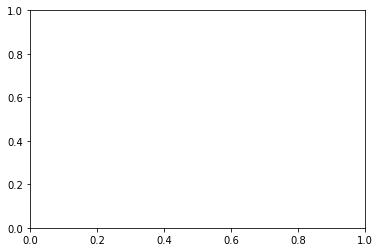

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, amp)
ax.set_xlabel('freqency (Hz)')
ax.set_ylabel('amplitude')